# Testing Integrator Functions Without Sympletic Methods

# Initial Setup

In [2]:
#!gcc -shared -O2 -fPIC ode.c -o libode.so

In [3]:
import ctypes
from ctypes import *
from numpy.ctypeslib import ndpointer
import numpy as np
import matplotlib.pyplot as plt
import numba
import math

In [4]:
from odesolver import *
from helpers import *
from interfunc import *

# func_2_body Testing

In [5]:
GM_S = 39.4229 #AU^3.yr^{-2} solar mass parameter

a_0 = 0.39
e_0 = 0.206
theta_E_0 = -3*np.pi/4
theta_0 = theta_E_0
x_0,v_x_0,y_0,v_y_0 = ellipse_to_xy(a_0, e_0, theta_0, theta_E_0, GM_S)
initial_mercury = [x_0,v_x_0,y_0,v_y_0]

In [6]:
total_time = 10*orbital_period(a_0,GM_S)
step_size = orbital_period(a_0,GM_S)/400
nsteps = int(total_time/step_size)
t,sol = solve_ode(func_2_body,[0.,total_time], nsteps, initial_mercury, args=[GM_S], method="RK4")
x,v_x,y,v_y = sol.T

Text(0.5, 1.0, 'Mercury Orbiting Sun Without Jupiter (10 orbital periods)')

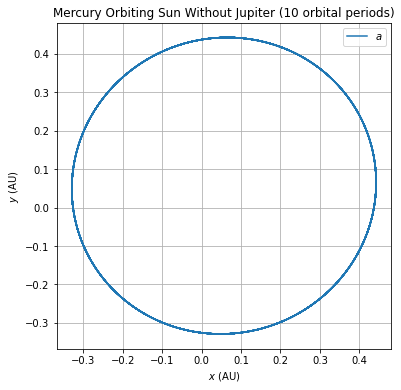

In [7]:
plt.figure(figsize=(6,6))
plt.plot(x,y,label=r"$a$")
plt.legend()
plt.grid()
plt.xlabel(r"$x$ (AU)")
plt.ylabel(r"$y$ (AU)")
plt.title(r"Mercury Orbiting Sun Without Jupiter (10 orbital periods)")